In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [3]:
# import the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
gen_sub_data = pd.read_csv('gender_submission.csv')


In [4]:
# preview train data
train_data.head()

#SibSp = number of siblings/spouses aboard
#Parch = number of parents/children aboard
#Ticket = ticket number
#Fare = passenger fare
#Cabin = cabin number
#Embarked = port they embarked from
#pclass = passenger class

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# add the survival colum back into the test data
combined_test = pd.merge(test_data, gen_sub_data, how='left')
combined_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [6]:
# combine the train and test data into one csv file
# this will make it easier to clean the data
# we will split the data again later
combined_data = [train_data, combined_test]
# write this to a new csv file
combined_data = pd.concat(combined_data)
combined_data.to_csv('combined_data.csv', index=False)


In [7]:
# bring in the combined data
combined_data = pd.read_csv('combined_data.csv')

In [8]:
# create column called family name
combined_data['FamilyName'] = combined_data['Name'].str.split(',').str[0]
combined_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [9]:
# create a column called Alone where 1 = alone and 0 = not alone
combined_data['Alone'] = np.where((combined_data['SibSp'] + combined_data['Parch']) > 0, 0, 1)
combined_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,1


In [10]:
combined_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
FamilyName      object
Alone            int64
dtype: object

In [11]:
combined_data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
FamilyName        0
Alone             0
dtype: int64

In [12]:
total_entries = combined_data.shape[0]
total_entries 

1309

In [26]:
# total alone = 1
total_alone = combined_data[combined_data['Alone'] == 1].shape[0]
total_alone

790

In [25]:
# total not alone = 0
total_not_alone = combined_data[combined_data['Alone'] == 0].shape[0]
total_not_alone

519

In [33]:

combined_data['Age'].mean()

29.881137667304014

In [39]:
age = 50
def normalize_data(data, max_value):
        norm_data =  data/max_value 
        return norm_data
max_age = train_data['Age'].max()
norm_age = normalize_data(age, max_age)
norm_age

0.625

/var/folders/x7/4frtg_jx34g69lycmb25nq5m0000gn/T/ipykernel_35114/1007156875.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


Text(0.5, 1.0, 'Survival Rate of Passengers who were Alone vs Not Alone')

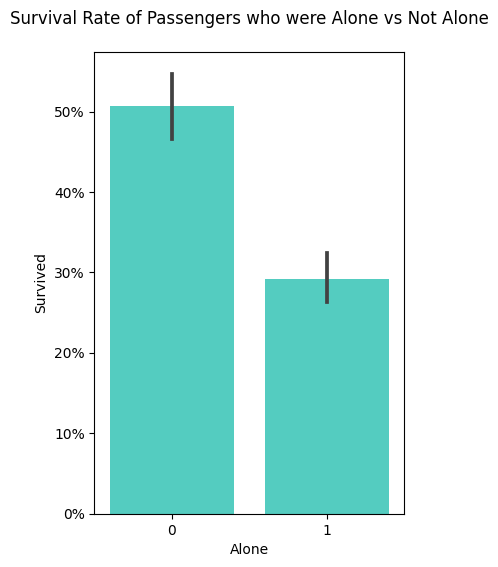

In [14]:
# plot a bar graph showing alone vs not alone that survived
plt.figure(figsize=(4, 6))
sns.barplot(x='Alone', y='Survived', data=combined_data, color='turquoise' )
# change the y axis to a percentage
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.title('Survival Rate of Passengers who were Alone vs Not Alone',pad=20, fontsize=12)



In [15]:
# create a column that converts males into 0 and females into 1
combined_data['Is Female'] = np.where(combined_data['Sex']=='female', 1, 0)
combined_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName,Alone,Is Female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,1,0


In [16]:
# drop the individuals who are alone where alone = 1
families_only = combined_data[combined_data['Alone'] == 0]
# sort families_only by family name
families_only = families_only.sort_values(by=['FamilyName'])
families_only.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName,Alone,Is Female
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S,Abbott,0,0
1283,1284,0,3,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.25,NaN,S,Abbott,0,0
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S,Abbott,0,1
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.00,NaN,C,Abelson,0,1
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.00,NaN,C,Abelson,0,0


In [17]:
# drop families 
individuals_only = combined_data[combined_data['Alone'] == 1]

In [18]:
# the percentage of individuals based on their sex
ind_female= individuals_only.iloc[:, 4].value_counts()[1] 
ind_male= individuals_only.iloc[:, 4].value_counts()[0] 
ind_total = ind_female + ind_male
print(f'There are {ind_total} passengers traveling alone of which ')
print(f'{ind_female} are female, which is {(ind_female/ind_total)*100:.0f}% of the total.')
print(f'{ind_male} are male, which is {(ind_male/ind_total)*100:.0f}% of the total.')

There are 790 passengers traveling alone of which 
194 are female, which is 25% of the total.
596 are male, which is 75% of the total.


In [19]:
# the number of female survivors (alone)
ind_sex_surv= individuals_only.iloc[:, [1,4]].value_counts()
ind_female_surv = ind_sex_surv[1][0]
fem_sur_perc = str(round((ind_female_surv/ind_female)*100))+'%'

# the number of male survivors (alone)

ind_male_surv = ind_sex_surv[1][1]
male_sur_perc = str(round((ind_male_surv/ind_male)*100))+'%'

print(male_sur_perc)

print(f'Out of {ind_male} males traveling alone {ind_male_surv} survived. ({(ind_male_surv/ind_male)*100:.0f}%)')
print(f'Out of {ind_female} females traveling alone {ind_female_surv} survived. ({(ind_female_surv/ind_female)*100:.0f}%)')

11%
Out of 596 males traveling alone 64 survived. (11%)
Out of 194 females traveling alone 167 survived. (86%)


In [20]:
# group by family name and count the number of people in each family
family_survival = families_only.iloc[:, 1].value_counts()

family_total = family_survival.sum()
print(f'There are {family_total} individuals traveling together.')

family_survived = family_survival[1]
fam_sur_perc = str(round((family_survived/family_total)*100))+'%'
print(f'Of which {family_survived} survived. ({(family_survived/family_total)*100:.0f}%)')

total_ind = individuals_only.iloc[:, 1].value_counts().sum()
print(f'There are {total_ind} individuals traveling alone.')

ind_survived = individuals_only.iloc[:, 1].value_counts()[1]
ind_sur_perc = str(round((ind_survived/total_ind)*100))+'%'
print(f'Of which {ind_survived} survived. ({(ind_survived/total_ind)*100:.0f}%)')


There are 519 individuals traveling together.
Of which 263 survived. (51%)
There are 790 individuals traveling alone.
Of which 231 survived. (29%)


In [21]:
# creat dictionaries containing the information I would like to plot

#-------------------------------------------
# ax[0]
#-------------------------------------------
# the individuals split into two groups: families and alone. 
# the total number in each group
totals_0 = {'Groups': family_total, 'Alone': total_ind}
names_a0 = list(totals_0.keys())
values_a0 = list(totals_0.values())
# the total number in each group that survived
surv_0 = {'Groups': family_survived, 'Alone': ind_survived}
names_sg0 = list(surv_0.keys())
values_sg0 = list(surv_0.values())

#-------------------------------------------
# ax[1] 
#-------------------------------------------
# the individuals split into male and female
# the total of each sex
totals_1 = {'Male': ind_male, 'Female': ind_female}
names_t1 = list(totals_1.keys())
values_t1 = list(totals_1.values())
# the total of each sex that survived
surv_1 = {'Male': ind_male_surv, 'Female': ind_female_surv}
names_si1 = list(surv_1.keys())
values_si1 = list(surv_1.values())

TypeError: get_dummies() missing 1 required positional argument: 'data'

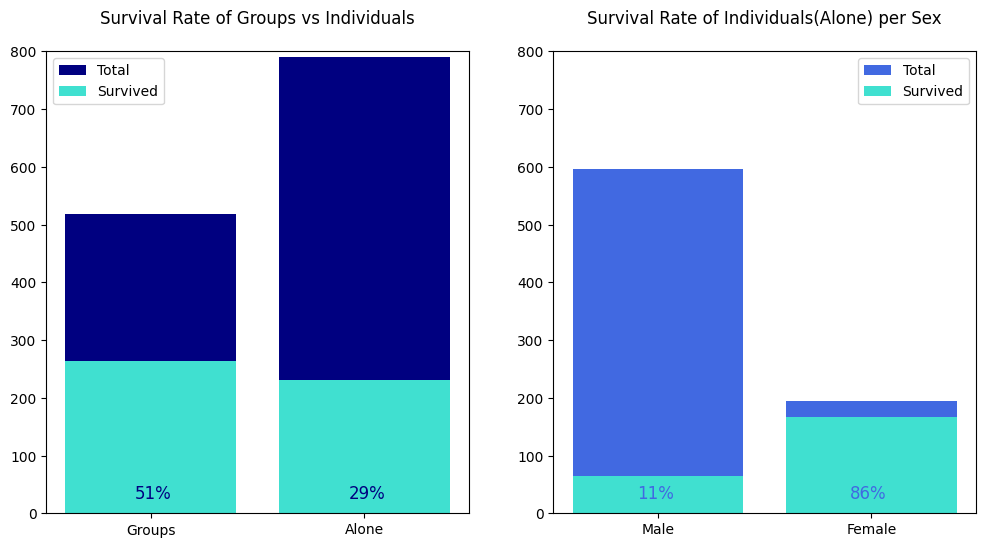

In [22]:
fig, ax = plt.subplots(1,2,figsize=(12, 6))
ax0 = ax[0]
ax1 = ax[1]

#-------------------------------------------
# ax[0] Showing the groups vs the individuals
#-------------------------------------------
ax0_c = plt.get_cmap('GnBu')
# plot the bar graph
ax0.bar(range(len(totals_0)), values_a0, tick_label=names_a0, color='navy')
ax0.bar(range(len(surv_0)), values_sg0, tick_label=names_sg0, color='turquoise')
ax0.set_title('Survival Rate of Groups vs Individuals', pad=20, fontsize=12)
ax0.legend(['Total', 'Survived'])
ax0.set_ylim(0, 800)

ax1.annotate(fam_sur_perc, xy=(0, 50), xytext=(-2.45, 25), fontsize=12, color='navy')
ax1.annotate(ind_sur_perc, xy=(0, 50), xytext=(-1.45, 25), fontsize=12, color='navy')

#-------------------------------------------
# ax[1] showing just the individuals split into male and females
#-------------------------------------------
# plot the bar graph
ax1.bar(range(len(totals_1)), values_t1, tick_label=names_t1, color='royalblue')
ax1.bar(range(len(surv_1)), values_si1, tick_label=names_si1, color='turquoise')
# add a title to the ax0 

ax1.set_title('Survival Rate of Individuals(Alone) per Sex',pad=20, fontsize=12)
ax1.legend(['Total', 'Survived'])
# change the y axis scale of ax1 from 0 to 800
ax1.set_ylim(0, 800)

ax1.annotate(male_sur_perc, xy=(0, 50), xytext=(-.1, 25), fontsize=12, color='royalblue')
ax1.annotate(fem_sur_perc, xy=(0, 50), xytext=(.9, 25), fontsize=12, color='royalblue')



pd.get_dummies()

In [ ]:
# passenger class analysis
# show the unique values in the passenger class column
print(combined_data['Pclass'].unique())
print('There are 3 unique values in the passenger class column.')

[3 1 2]
There are 3 unique values in the passenger class column.


In [ ]:
# compare survival rate of each class
# group by passenger class and survival
pclass_survival = combined_data.iloc[:, [2,1]].value_counts()
# the total number of passengers in each class
pclass_total = pclass_survival.sum()
print(f'There are {pclass_total} passengers in total.')
pclass_survival


There are 1309 passengers in total.


Pclass  Survived
3       0           518
        1           191
1       1           186
2       0           160
1       0           137
2       1           117
dtype: int64

/var/folders/x7/4frtg_jx34g69lycmb25nq5m0000gn/T/ipykernel_31609/3346750720.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


Text(0.5, 0, 'Passenger Class')

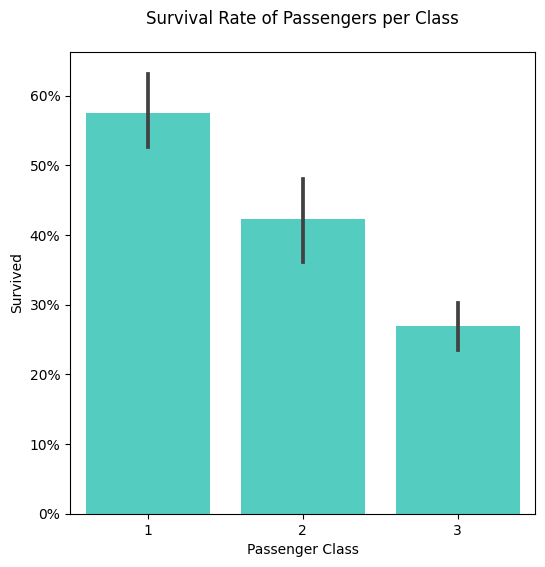

In [ ]:
# plot a bar graph showing alone vs not alone that survived
plt.figure(figsize=(6, 6))
sns.barplot(x='Pclass', y='Survived', data=combined_data, color='turquoise' )
# change the y axis to a percentage
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.title('Survival Rate of Passengers per Class',pad=20, fontsize=12)
plt.xlabel('Passenger Class')


In [ ]:
# analysing the embarked column

# drop the two rows with null values
combined_data.dropna(subset=['Embarked'], inplace=True)

# show the unique values in the embarked column
print(combined_data['Embarked'].unique())
combined_data['Embarked'].isnull().sum()

['S' 'C' 'Q']


0

/var/folders/x7/4frtg_jx34g69lycmb25nq5m0000gn/T/ipykernel_31609/1317072028.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


Text(0.5, 0, 'Passenger Class')

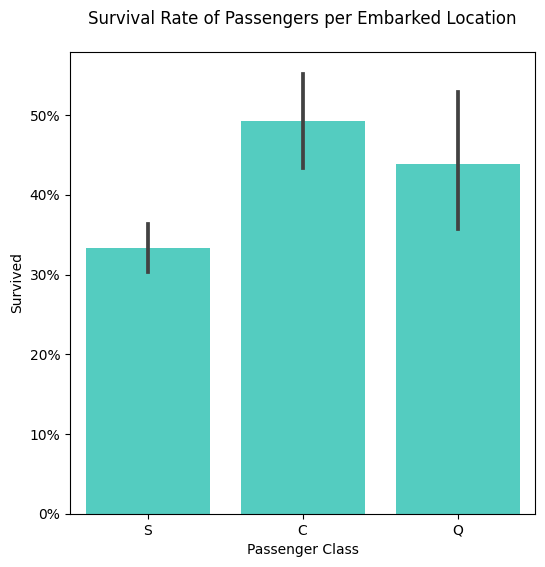

In [ ]:
# plot a bar graph showing alone vs not alone that survived
plt.figure(figsize=(6, 6))
sns.barplot(x='Embarked', y='Survived', data=combined_data, color='turquoise' )
# change the y axis to a percentage
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.title('Survival Rate of Passengers per Embarked Location',pad=20, fontsize=12)
plt.xlabel('Passenger Class')

In [40]:
# write combined data to a new csv file
combined_data.to_csv('new_combined_data.csv', index=False)

### Visual Analysis Conclusion

You have the highest survival rate if you boarded at location 'C' with a 'First Class' ticket and you were in a group.

In [52]:
# Working out survival percentages for tha app
sex = combined_data.iloc[:, [-1,1]].value_counts()
sex


Is Female  Survived
0          0           734
1          1           385
0          1           109
1          0            81
dtype: int64

In [49]:
passenger_total = sex.sum()
passenger_total

1309

In [50]:
total_females = sex[1]
total_females
#alone_sur_perc = str(round((alone_survived/alone_total)*100))+'%'
#alone_sur_perc
#print(f'Of which {family_survived} survived. ({(family_survived/family_total)*100:.0f}%)')

466

In [53]:
t_fem_surv = sex[1][1]
t_fem_surv

385

In [51]:
total_males = sex[0]
total_males

843

In [56]:
t_men_sur = sex[0][1]
t_men_sur

109

In [58]:
round((t_men_sur/total_males)*100)

13

In [59]:
round((t_fem_surv/total_females)*100)

83

In [69]:
# CLASS
cl_surv = combined_data.iloc[:, [1,2]].value_counts()
cl_surv

Survived  Pclass
0         3         518
1         3         191
          1         186
0         2         160
          1         137
1         2         117
dtype: int64

In [64]:
# CLASS
cl = combined_data.iloc[:,2].value_counts()
cl

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [65]:
c1_total = cl[1]
c1_total

323

In [66]:
c2_total = cl[2]
c2_total

277

In [67]:
c3_total = cl[3]
c3_total

709

In [81]:
c1_surv = cl_surv[1][1]
c1_surv

186

In [83]:
c2_surv = cl_surv[1][2]
c2_surv

117

In [84]:
c3_surv = cl_surv[1][3]
c3_surv

191

In [85]:
round((c1_surv/c1_total)*100)

58

In [86]:
round((c2_surv/c2_total)*100)

42

In [87]:
round((c3_surv/c3_total)*100)

27

In [89]:
# Location
lo = combined_data.iloc[:,-4].value_counts()
lo

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [90]:
S_total = lo['S']
S_total

914

In [91]:
C_total = lo['C']
C_total

270

In [92]:
Q_total = lo['Q']
Q_total

123

In [93]:
# Location Survived
lo_serv = combined_data.iloc[:,[1,-4]].value_counts()
lo_serv

Survived  Embarked
0         S           609
1         S           305
0         C           137
1         C           133
0         Q            69
1         Q            54
dtype: int64

In [97]:
s_surv = lo_serv[1]['S']
s_surv

305

In [98]:
C_serv = lo_serv[1]['C']
C_serv

133

In [99]:
Q_serv = lo_serv[1]['Q']
Q_serv

54

In [102]:
round((s_surv/S_total)*100)

33

In [103]:
round((C_serv/C_total)*100)

49

In [104]:
round((Q_serv/Q_total)*100)

44